In [1]:
import os

import pandas
import numpy as np
import scipy.io

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import skimage

In [2]:
im = plt.imread("../data/external/CRCHistoPhenotypes_2016_04_28/Classification/img2/img2.bmp")
m1 = scipy.io.loadmat("../data/external/CRCHistoPhenotypes_2016_04_28/Classification/img2/img2_fibroblast.mat")
m2 = scipy.io.loadmat("../data/external/CRCHistoPhenotypes_2016_04_28/Classification/img2/img2_epithelial.mat")
m3 = scipy.io.loadmat("../data/external/CRCHistoPhenotypes_2016_04_28/Classification/img2/img2_inflammatory.mat")
m4 = scipy.io.loadmat("../data/external/CRCHistoPhenotypes_2016_04_28/Classification/img2/img2_others.mat")

n = scipy.io.loadmat("../data/external/CRCHistoPhenotypes_2016_04_28/Detection/img2/img2_detection.mat")


In [3]:
print([i for i in m1["detection"]])

[array([ 112.12483487,    4.1327609 ]), array([ 409.02047556,  288.47886394]), array([ 426.85402906,  310.93593131]), array([ 451.95310436,  319.52245707]), array([ 354.1988111 ,  401.42470277]), array([ 406.37846764,  369.06010568]), array([ 445.34808454,  403.40620872]), array([ 228.70343461,  279.2318362 ]), array([ 219.45640687,  291.12087186])]


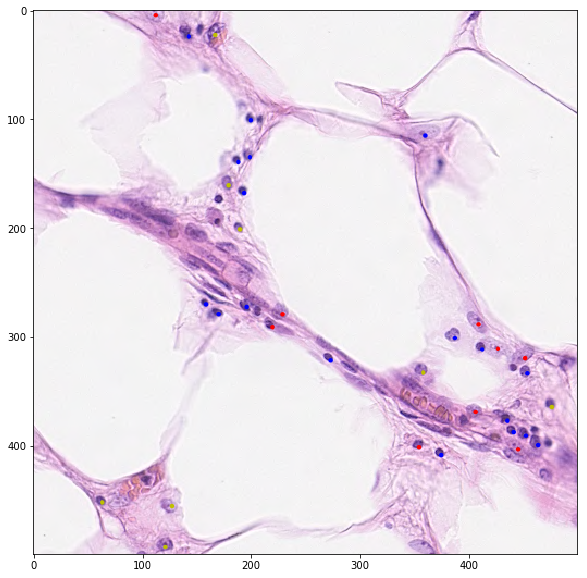

In [4]:
plt.figure(figsize=(10,10))
implot = plt.imshow(im)

plt.scatter(x=m1["detection"][:,0], y=m1["detection"][:,1], c='r', s=20, edgecolors='')
plt.scatter(x=m2["detection"][:,0], y=m2["detection"][:,1], c='g', s=20, edgecolors='')
plt.scatter(x=m3["detection"][:,0], y=m3["detection"][:,1], c='b', s=20, edgecolors='')
plt.scatter(x=m4["detection"][:,0], y=m4["detection"][:,1], c='y', s=20, edgecolors='')
plt.show()

# Extracing patches

In [5]:
def extract_patch(image, patch_center, patch_size=(52,52)):
    patch_y = int(patch_center[0] - patch_size[0]/2)
    patch_x = int(patch_center[1] - patch_size[1]/2)
    print("patch_center", patch_center)
    print("patch_y, patch_x", patch_y, patch_x)
    print(image.shape[0]-1-patch_size[0]/2, image.shape[1]-1-patch_size[1]/2)
    print(image.shape)
    
    if patch_y < 0 or patch_x < 0 or patch_y > image.shape[0]-1-patch_size[0] or patch_x > image.shape[1]-1-patch_size[1]:
        image = np.lib.pad(image, ((int(patch_size[0]/2), int(patch_size[1]/2)), 
                                 (int(patch_size[0]/2), int(patch_size[1]/2)),
                                 (0,0)), 'symmetric')
        patch_x += int(patch_size[1]/2)
        patch_y += int(patch_size[0]/2)
        
    patch_image = image[patch_x:patch_x+patch_size[0], patch_y:patch_y+patch_size[1]]
    return patch_image

[ 121.04161162  493.2344782 ]
patch_center [ 121.04161162  493.2344782 ]
patch_y, patch_x 91 463
469.0 469.0
(500, 500, 3)
img shape (60, 60, 3)


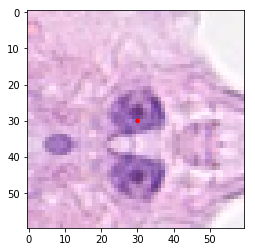

In [6]:
patch_size = (60, 60)
pos = m4["detection"][4]
print(pos)
im_patch = extract_patch(im, pos, patch_size=patch_size)
implot = plt.imshow(im_patch)
print("img shape", im_patch.shape)
plt.scatter(x=patch_size[0]/2, y=patch_size[1]/2, c='r', s=20, edgecolors='')
plt.show()

In [77]:
52/2

26.0